# Load the MNIST Dataset

In [1]:
import tensorflow as tf
print(tf.__version__)

2.18.0


In [2]:
mnist = tf.keras.datasets.mnist
#from keras.datasets import mnist #loading the MNIST dataset
import matplotlib.pyplot as plt

** Plot the sample image**





In [3]:
MNIST_Image_data = mnist.load_data()

In [4]:
(x_train, y_train),(x_test,y_test)= MNIST_Image_data

In [5]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

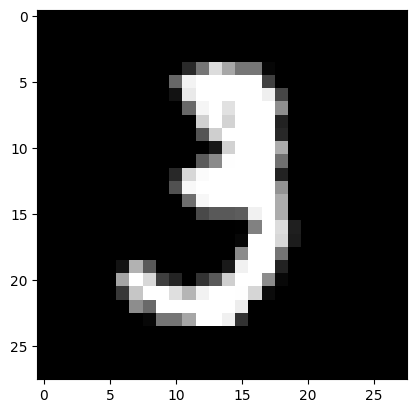

In [6]:
plt.imshow(x_train[10], cmap= plt.get_cmap('gray'))

### Model building using Multi-Layer Perceptron using MNIST Dataset.

**Import the required libraries**

In [15]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
# from keras.utils import np_utils
from tensorflow.keras.utils import to_categorical

In [16]:
x_train.shape[0], x_train.shape[1], x_train.shape[2]

(60000, 28, 28)

# Reshaping the data
 

In [17]:

number_pix = x_train.shape[1] * x_train.shape[2] # 28 * 28 = 784 pixels



In [18]:
X_train = x_train.reshape(x_train.shape[0], number_pix).astype('float32')
X_test = x_test.reshape(x_test.shape[0], number_pix).astype('float32')

In [19]:
X_train.shape, X_train.dtype, X_test.shape, X_test.dtype

((60000, 784), dtype('float32'), (10000, 784), dtype('float32'))

# Normalize the data

In [20]:
X_train = X_train / 255  # Scaling values from (0,255) -> (0,1)
X_test = X_test / 255   # Scaling values from (0,255) -> (0,1)

# One-hot encoding for labels

In [23]:
# n_classes = 10
# print("Shape before one-hot encoding: ", y_train.shape)
# Y_train = np_utils.to_categorical(y_train,n_classes)
# Y_test = np_utils.to_categorical(y_test, n_classes)
# print("Shape after one-hot encoding: ", Y_train.shape)

from keras.utils import to_categorical  # Correct import for one-hot encoding

n_classes = 10
print("Shape before one-hot encoding: ", y_train.shape)
Y_train = to_categorical(y_train, n_classes)  # Use to_categorical directly
Y_test = to_categorical(y_test, n_classes)
print("Shape after one-hot encoding: ", Y_train.shape)


Shape before one-hot encoding:  (60000,)
Shape after one-hot encoding:  (60000, 10)


# Build the MLP model

In [24]:
model = Sequential()
model.add(Dense(number_pix, input_shape=(number_pix,), activation='relu'))
model.add(Dense(n_classes, activation='softmax'))

C:\Users\kalim\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [25]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 784)            │       615,440 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         7,850 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 623,290 (2.38 MB)

 Trainable params: 623,290 (2.38 MB)

 Non-trainable params: 0 (0.00 B)

In [26]:
# Compile the midel
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

# Run the MLP model

In [27]:
model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs =10, batch_size = 200, verbose=2)
score = model.evaluate(X_test,Y_test, verbose=0)
print('The error is: %.2f%%'%(100-score[1]*100))

Epoch 1/10
300/300 - 4s - 14ms/step - accuracy: 0.9220 - loss: 0.2754 - val_accuracy: 0.9585 - val_loss: 0.1397
Epoch 2/10
300/300 - 3s - 9ms/step - accuracy: 0.9671 - loss: 0.1124 - val_accuracy: 0.9706 - val_loss: 0.0983
Epoch 3/10
300/300 - 2s - 8ms/step - accuracy: 0.9792 - loss: 0.0715 - val_accuracy: 0.9768 - val_loss: 0.0761
Epoch 4/10
300/300 - 2s - 8ms/step - accuracy: 0.9851 - loss: 0.0514 - val_accuracy: 0.9798 - val_loss: 0.0667
Epoch 5/10
300/300 - 2s - 7ms/step - accuracy: 0.9893 - loss: 0.0372 - val_accuracy: 0.9794 - val_loss: 0.0642
Epoch 6/10
300/300 - 2s - 7ms/step - accuracy: 0.9927 - loss: 0.0269 - val_accuracy: 0.9798 - val_loss: 0.0649
Epoch 7/10
300/300 - 2s - 7ms/step - accuracy: 0.9947 - loss: 0.0206 - val_accuracy: 0.9799 - val_loss: 0.0621
Epoch 8/10
300/300 - 2s - 7ms/step - accuracy: 0.9968 - loss: 0.0142 - val_accuracy: 0.9805 - val_loss: 0.0611
Epoch 9/10
300/300 - 2s - 7ms/step - accuracy: 0.9979 - loss: 0.0105 - val_accuracy: 0.9811 - val_loss: 0.0630


# Summary

* With the MLP, we got error rate is of 1.84%. Means the accuract is about 99.84%.
* Lets see what will be the accuracy of MNIST digit classification by using CNN. [Chick here](https://github.com/ajju198821/Deep-Learning-Work/blob/main/MNIST_digit_classigication_by_CNN.ipynb) to look at it.